In [6]:
# Importing the usual culprits
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib import cm
# Color scheme for detector coverage
cc = cm.Dark2(np.linspace(0,1,9))

In [8]:
# Loading synthetic spectrum
wave,spec =  pickle.load( open( "spectrum.p", "rb" ) )
wave = wave*0.1

In [65]:
# Plotting routine
def plot_spec(w,s,files,xmin,nx,dx,outfile):
    plt.rcParams['figure.figsize'] = [12, 4*nx]
    plt.rcParams['font.size'] = 18
    plt.rcParams['font.family'] = "Public Sans"
    
    for i in range(nx):
        plt.subplot(nx,1,i+1)
        plt.xlim(xmin+i*dx,xmin+(i+1)*dx)
        plt.ylim(0.0,1.25)
        for j in range(len(files)):
            sets = np.loadtxt(files[j])
            for ii in range(len(sets[:,0])):
                if ii == 0 and i == 0:
                    plt.hlines(1.05+j*0.05,sets[ii,0],sets[ii,1],color=cc[j],alpha=0.5, linewidth=5, label=files[j])
                else:
                    plt.hlines(1.05+j*0.05,sets[ii,0],sets[ii,1],color=cc[j],alpha=0.5, linewidth=5)
  
        if i == nx-1:
            plt.xlabel('Wavelength / nm')
        if i == 0:
            plt.legend(loc="lower left")
        plt.plot(w,s)
    plt.savefig(outfile+'.pdf')
    plt.show()
        

# Y-band

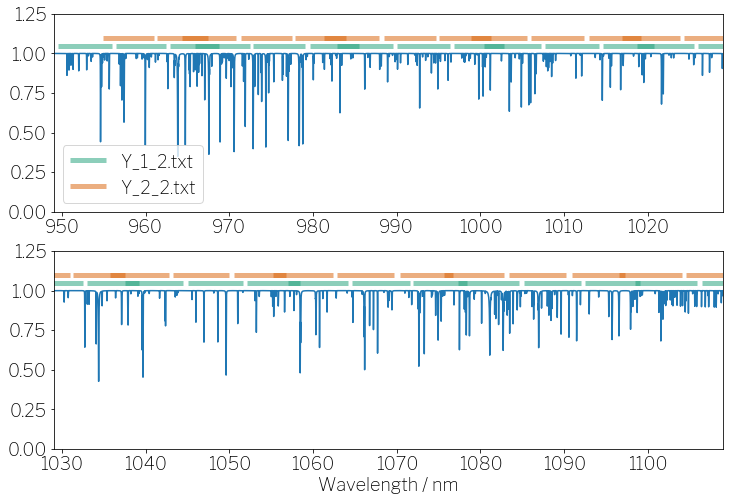

In [66]:
ff = np.array(['Y_1_2.txt','Y_2_2.txt'])
w,s = wave[np.where(wave<1130.)],spec[np.where(wave<1130.)]
plot_spec(w,s,ff,949,2,80,'Y')

# J-band

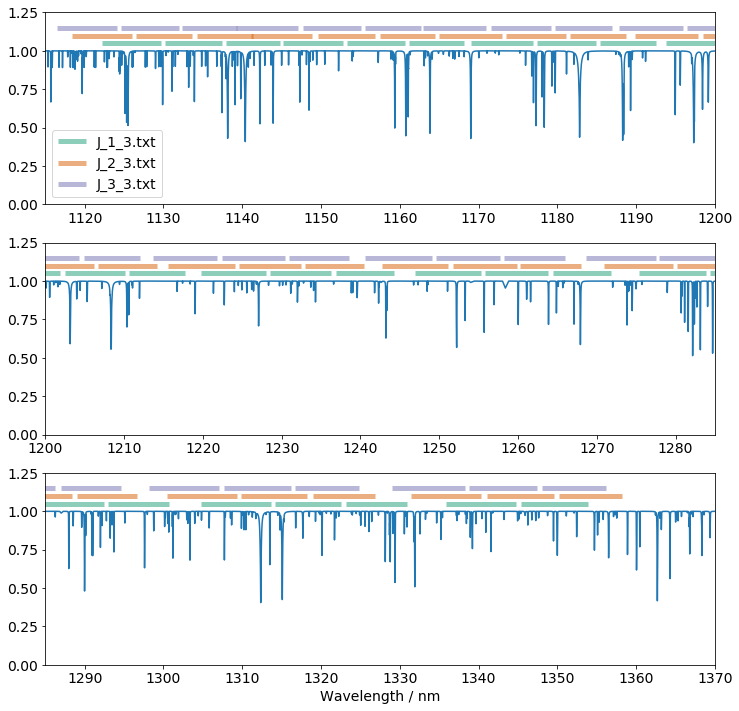

In [32]:
w,s = wave[np.where(wave<2000)],spec[np.where(wave<2000)]
ff = np.array(['J_1_3.txt','J_2_3.txt','J_3_3.txt'])
plot_spec(w,s,ff,1115,3,85,'J')

# H-band

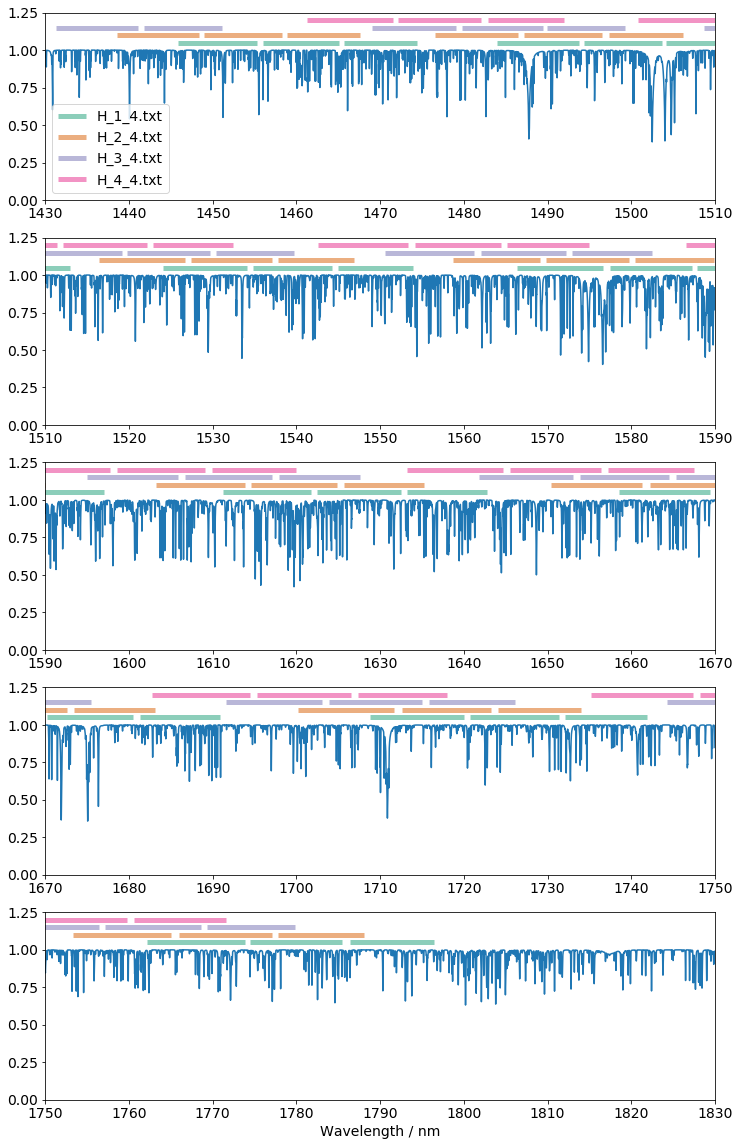

In [33]:
w,s = wave[np.where(wave<2000)],spec[np.where(wave<2000)]
ff = np.array(['H_1_4.txt','H_2_4.txt','H_3_4.txt','H_4_4.txt'])
plot_spec(w,s,ff,1430,5,80,'H')

# K-band

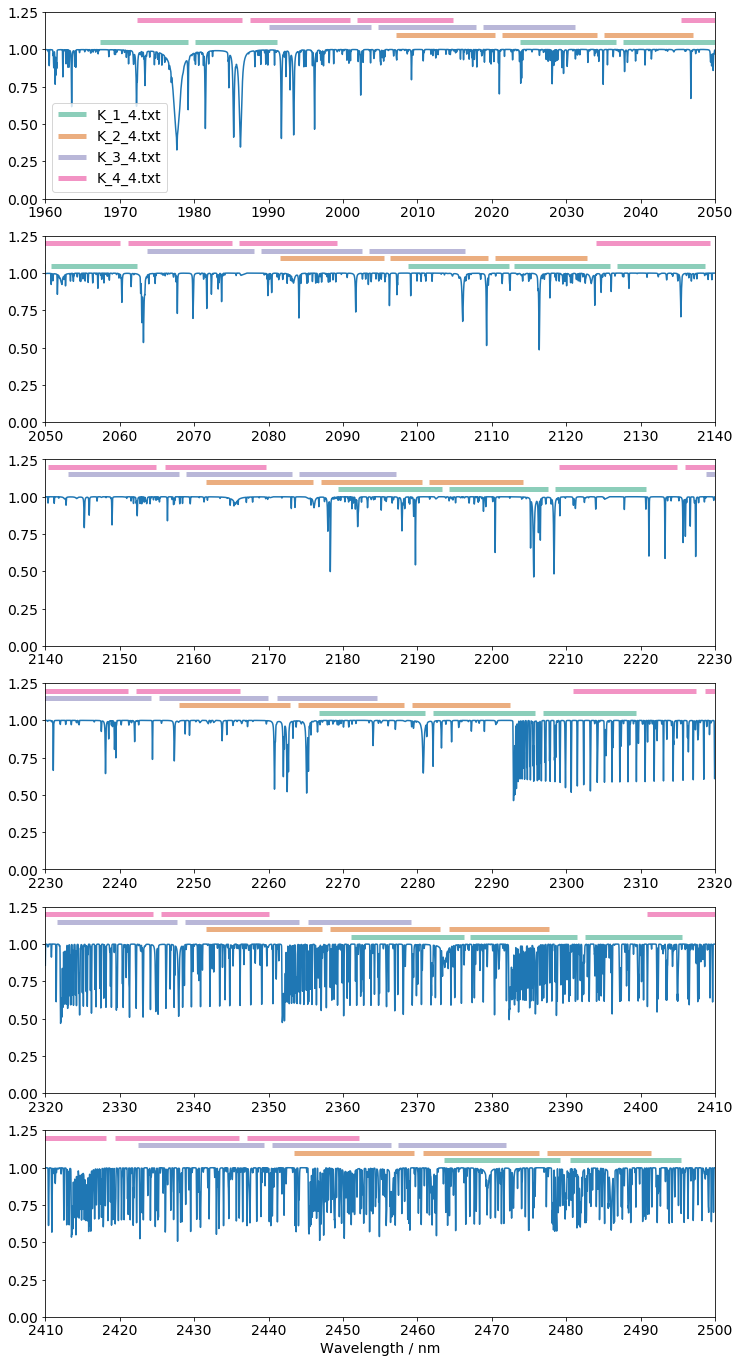

In [34]:
w,s = wave[np.where(wave>1800)],spec[np.where(wave>1800)]
ff = np.array(['K_1_4.txt','K_2_4.txt','K_3_4.txt','K_4_4.txt'])
plot_spec(w,s,ff,1960,6,90,'K')